In [13]:
import pandas as pd

# Load datasets
netflix_df = pd.read_csv("C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/netflix/netflix_titles.csv") 
amazon_df = pd.read_csv("C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/amazon/amazon_prime_titles.csv")


# Basic data cleaning
netflix_df.dropna(subset=['title', 'listed_in'], inplace=True)
amazon_df.dropna(subset=['title', 'listed_in'], inplace=True)

# Normalize categories
netflix_df['listed_in'] = netflix_df['listed_in'].str.lower()
amazon_df['listed_in'] = amazon_df['listed_in'].str.lower()

# Select data including titles and categories
netflix_df = netflix_df[['title', 'listed_in']]
amazon_df = amazon_df[['title', 'listed_in']]

# Separate categories (with exploit method)
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(', ')
netflix_df = netflix_df.explode('listed_in')

amazon_df['listed_in'] = amazon_df['listed_in'].str.split(', ')
amazon_df = amazon_df.explode('listed_in')


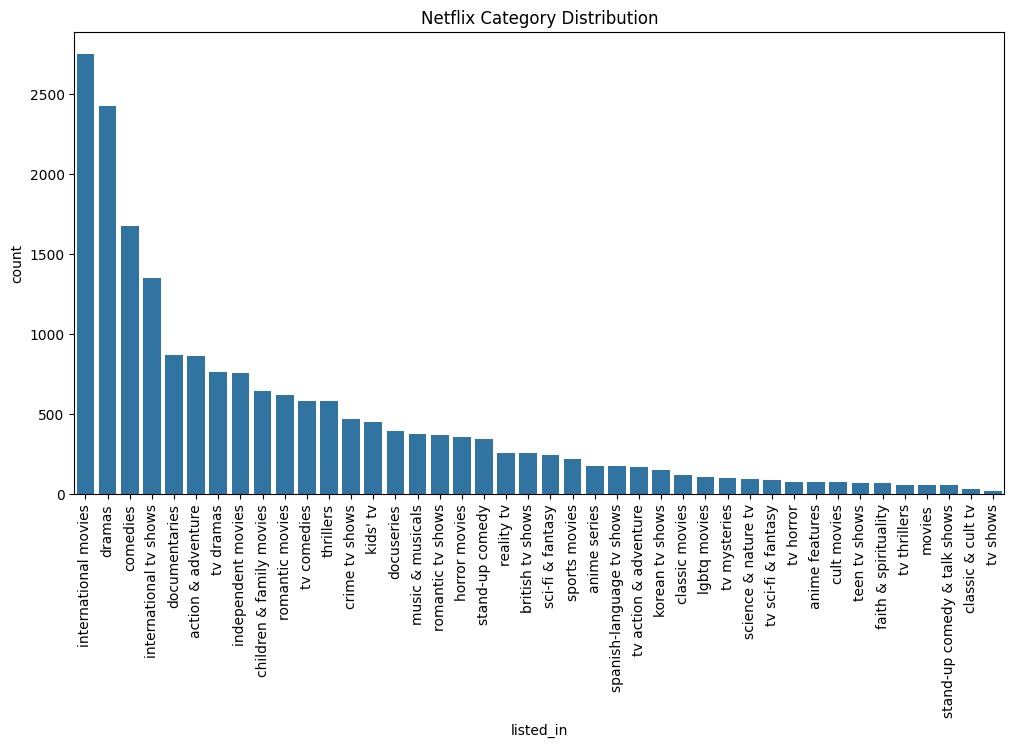

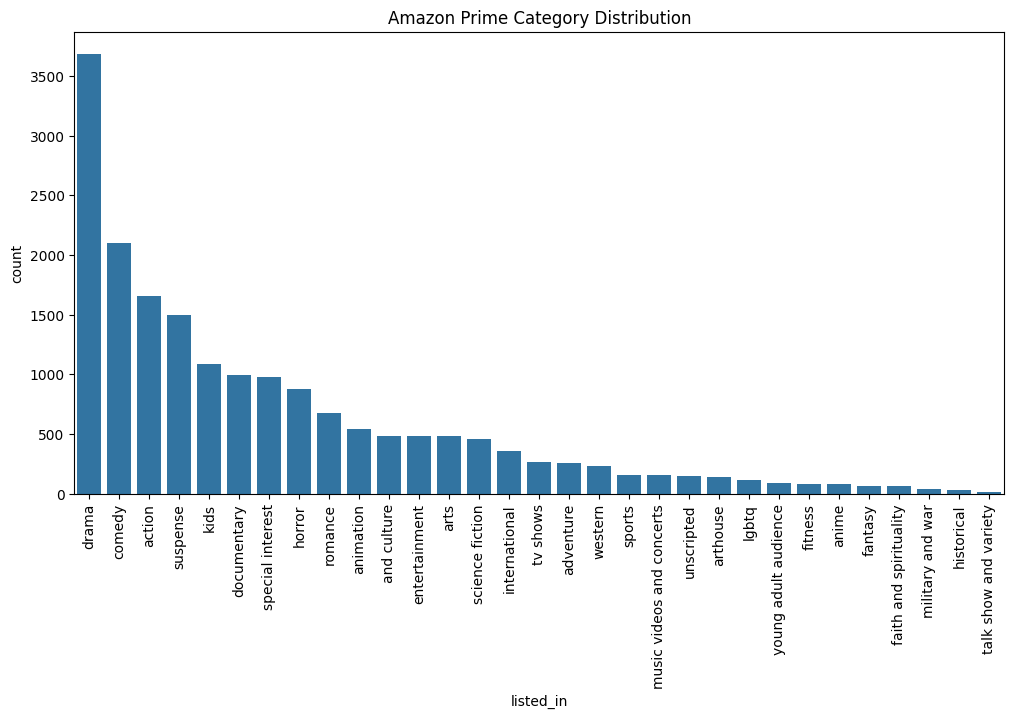

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Netflix category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='listed_in', order=netflix_df['listed_in'].value_counts().index)
plt.title('Netflix Category Distribution')
plt.xticks(rotation=90)
plt.show()

# Amazon Prime category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=amazon_df, x='listed_in', order=amazon_df['listed_in'].value_counts().index)
plt.title('Amazon Prime Category Distribution')
plt.xticks(rotation=90)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Combine data sets
df = pd.concat([netflix_df, amazon_df], ignore_index=True)

# Separation of training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['listed_in'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# Evaluate the results
print(classification_report(y_test, y_pred))


                              precision    recall  f1-score   support

                      action       0.07      0.03      0.04       342
          action & adventure       0.00      0.00      0.00       190
                   adventure       0.00      0.00      0.00        52
                 and culture       0.00      0.00      0.00       108
                   animation       0.00      0.00      0.00       105
                       anime       0.00      0.00      0.00        13
              anime features       0.00      0.00      0.00         9
                anime series       0.00      0.00      0.00        34
                    arthouse       0.00      0.00      0.00        25
                        arts       0.00      0.00      0.00        94
            british tv shows       0.00      0.00      0.00        48
    children & family movies       0.62      0.04      0.08       120
           classic & cult tv       0.00      0.00      0.00         5
              class

C:\Users\cmbme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cmbme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cmbme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [21]:
# Combine Netflix and Amazon datasets
combined_df = pd.merge(netflix_df, amazon_df, on='title', suffixes=('_netflix', '_amazon'))

# Find different categories with the same title
same_title_different_categories = combined_df[combined_df['listed_in_netflix'] != combined_df['listed_in_amazon']]

# View results
print(same_title_different_categories)


                   title   listed_in_netflix listed_in_amazon
0              Intrusion           thrillers           action
1               Paranoia           thrillers            drama
2               Paranoia           thrillers         suspense
3             Safe House  action & adventure           comedy
4             Safe House  action & adventure         suspense
...                  ...                 ...              ...
1637              Wolves       sports movies  science fiction
1638  World Trade Center  action & adventure            drama
1639  World Trade Center  action & adventure         suspense
1640  World Trade Center              dramas            drama
1641  World Trade Center              dramas         suspense

[1642 rows x 3 columns]


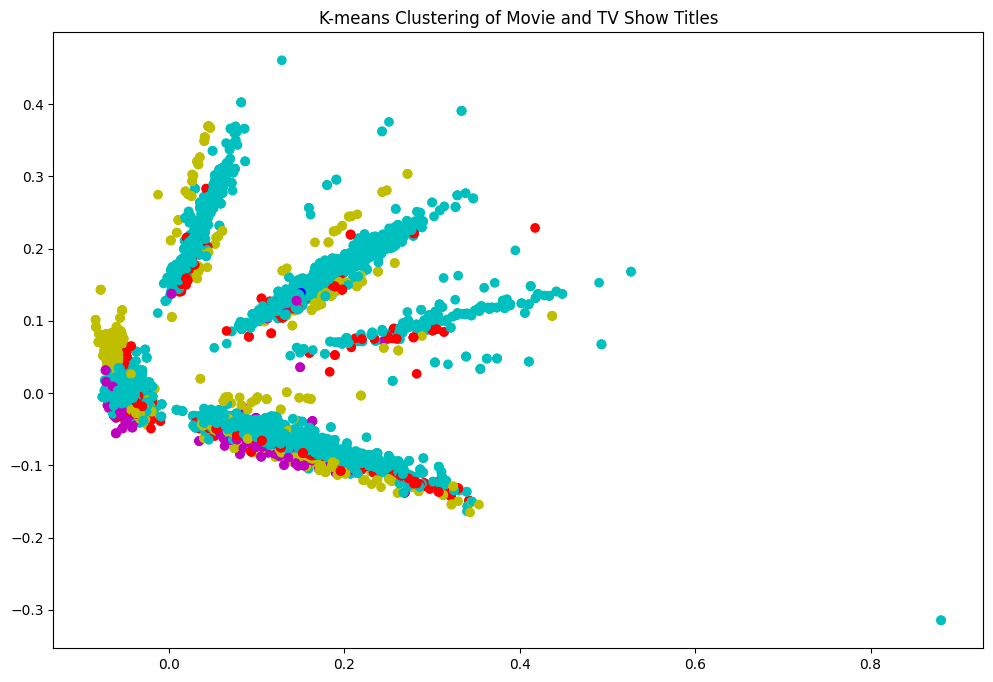

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Vectorize the entire dataset
X_tfidf = vectorizer.fit_transform(df['title'])

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Visualize clustering results
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X_tfidf.toarray())

colors = ["r", "b", "c", "y", "m"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in clusters])

plt.title('K-means Clustering of Movie and TV Show Titles')
plt.show()


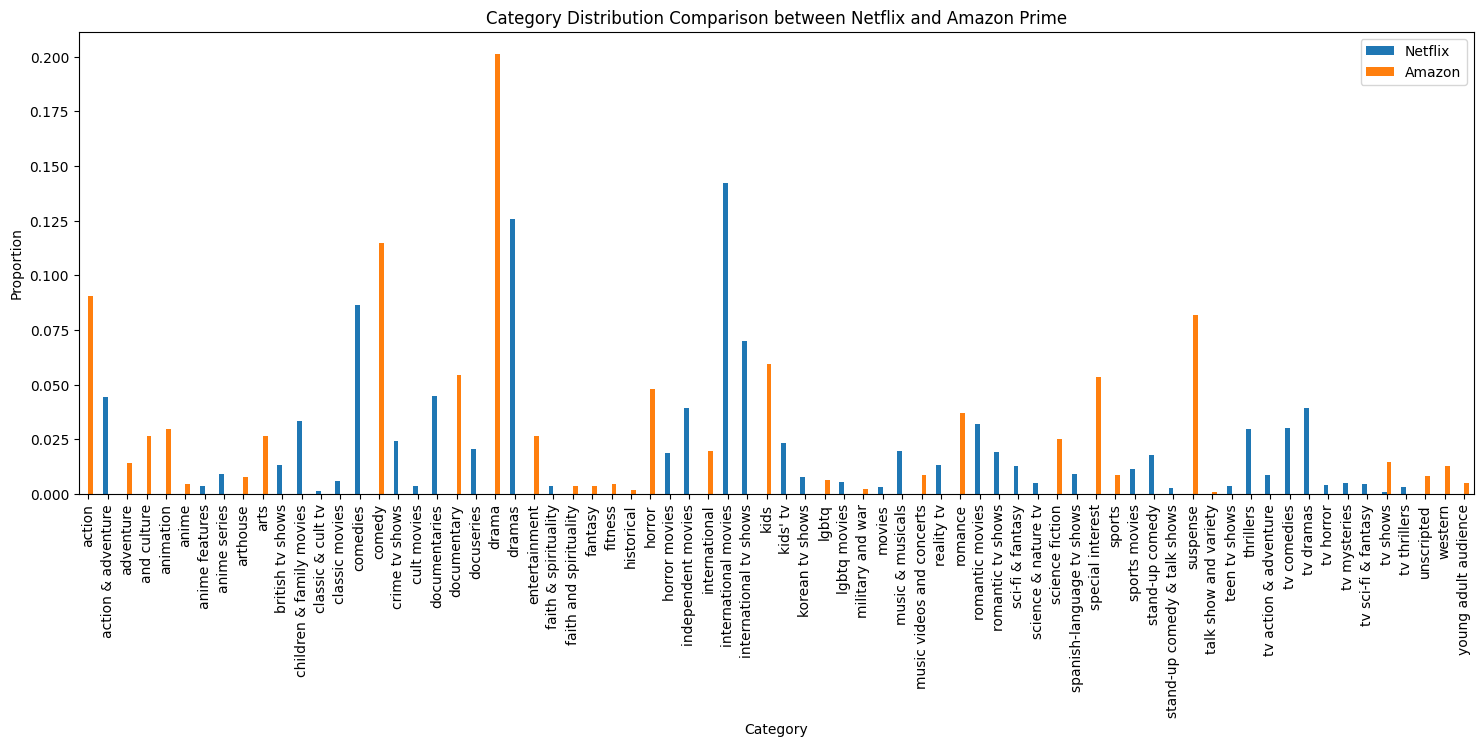

In [20]:
# Comparing Netflix and Amazon Prime category distributions
category_distribution_netflix = netflix_df['listed_in'].value_counts(normalize=True)
category_distribution_amazon = amazon_df['listed_in'].value_counts(normalize=True)

# Merge category distributions
category_comparison = pd.DataFrame({
    'Netflix': category_distribution_netflix,
    'Amazon': category_distribution_amazon
}).fillna(0)

# Comparison with bar chart
category_comparison.plot(kind='bar', figsize=(18, 6))
plt.title('Category Distribution Comparison between Netflix and Amazon Prime')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()
